<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Louvain_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Louvain Method Explained

## Forming Clusters

The Louvain method for community detection (clustering) extracts communities from large networks. Louvain is a greedy optimization method that runs in time $\mathcal{O}(n \cdot \log n)$ where $n$ is the number of nodes in the network. As we kernelize this method we are increasing the dimensionality to help Louvain create clusters of any shape and not be limited to the standard shape divisions of louvain's. In kernelizing Louvains, we can have clusters within clusters.

## Louvain Algorithmic Steps

(a) Initialize node clusters. \\
(b) Test all cluster combinations. \\
(c) Calculate all modularities (Q). \\
(d) Maximize for optimal Q. \\
      
Then, (b), (c), and (d) repeat until Q converges. This  example converged at the fifth iteration.

## Calculating Modularity (Q)

This is an optimization problem. The goal is to maximize the modularity score of the entire graph, given its clustering. This is accomplished by the following with $n$ being the number of nodes and maximum number of clusters.

Given the previous assignments $c_1, \dots, c_n$, calculate the modularity:

\begin{align}
Q &= \frac{1}{2m} \sum_{ij} \left[ A_{ij} - \frac {k_i k_j}{2m} \right] \delta \left( c_i, c_j \right)
\end{align}

Let $m$ be the total number of edges in the graph, $A$ be the node adjacency matrix, and $k_i$ be the total number of edges for node $n_i$. The portion $\delta \left( c_i, c_j \right) $ is the Kronecker Delta function and equals 1 if nodes $n_i$ and $n_j$ are in the same cluster, and 0 otherwise.

## Optimizing Louvain

To optimize our modularity function we want to convert the iterative, component-wise formula into a linear algebra formula.

\begin{align}
Q &= \frac{1}{2m} \sum_{ij} \left[ A_{ij} - \frac {k_i k_j}{2m} \right] \delta \left( c_i, c_j \right) \\
&= \frac{1}{2m} \text{trace}\left( S^T B S \right)
\end{align}

We will define these terms, $S, B$, and $k$ in the following slides.

### Defining Terms: $S$

To prove the previous statement equality (2), we first need to define some terms. $S$ is the $\left( |n| , |C| \right)$ cluster assignment matrix that captures the community membership of each node. Since each node is initially given it's own cluster, $S$ is initialized as the identity. For instance, when node 0 is testing cluster aggregation with node 1, the $S$ matrix transforms like this:
$$
S = \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & {\color{red}1} & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 1 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix} \longrightarrow \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0\\
    {\color{red}1} & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 1 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

### Defining Terms: $B$ and $e_i$

To continue proving the equality (2), we also need to define two more terms. $B$ is the $\left( |n| , |n| \right)$ modularity matrix where $B_{ij}$ is defined as:
\begin{eqnarray*}
    B_{ij} &=& A_{ij} - \frac{k_i k_j}{2m} \\
    B &=& \underset{(n,n)}{A} - \underset{(n,n)}{kk^T} \underset{(1,1)}{\left( \frac{1}{2m} \right)}\\
\end{eqnarray*}
Also, we add that $e_i$ is a one-hot encoded vector comprised of all zeros except a 1 at position $i$:
\begin{eqnarray*}
    e_i &=& \left[ 0, 0, \cdots, \underset{i}{1}, \cdots, 0 \right]
\end{eqnarray*}

### Mathematical Proof

\begin{eqnarray*}
    Q &=& \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m}\right] \delta \left( c_i, c_j \right) \\
    &=& \frac{1}{2m} \sum_{i,j} \left( a_{ij} - \frac{k_i k_j}{2m}\right) \sum_l s_{il} s_{jl} \quad \text{using claim.}\\
    &=& \frac{1}{2m} \sum_{i,j,l} b_{ij} s_{il} s_{jl} \\
    &=& \frac{1}{2m} \sum_l \sum_{i,j} b_{i,j} s_{il} s_{jl} \\
    &=& \frac{1}{2m} \sum_l \left[ S^T B S \right]_{ll}\\
    &=& \frac{1}{2m} \text{trace}\left( S^T B S \right)
\end{eqnarray*}

We claim that:
\begin{eqnarray*}
    \delta\left( c_i, c_j \right) &=& \sum_l s_{il} s_{jl} \\    
    s_i &=& \sum_{i:n_j \in c_i} e_i \\
    s_{ij} &=& 1 \text{ if } n_i \in c_j, 0 \text{ otherwise} \\
    s_{il}s_{jl} &=& 1 \text{ if } n_i \in c_l \text{ and } n_j \in c_l, 0 \text{ otherwise} \\
    \text{Thus } \delta \left( c_i, c_j \right) &=& \sum_l s_{il} s_{jl}
\end{eqnarray*}

## Kernelizing

As mentioned in the first slide, the Louvain method is designed for network (or graph) data structures. Though we won't be able to kernelize graphs, we can kernelize data points and treat them like fully connected graphs, then perform the Louvain's.

We use low dimensional data and project with a kernel to a higher dimensional space and then interpret as a graph. Kernelizing the datapoints will provide us with a fully connected graph with weights between each datapoint based on which kernel is used.

# Imports

In [ ]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import numpy as np

# Kernels

A collection of vectorized kernel functions x, and y are assumed to be Matrices if you want to evaluate on a single point reshape the vectors from d to d x 1, this will turn them into matrices. All the kernel functions work with vectors or matrices with the exception of k5v which requires matrices as inputs. (This has been fixed with the `AutoReshaper()` function).

## [`k1v`] Linear Kernel

Linear kernel, notice, if x, and y are vectors, this will return a scalar if x, and y are matrices, this will  return a matrix and this is an efficient and vectorized implementation of the linear kernel function.

In [ ]:
def k1v(x,y):
    #x = AutoReshaper(x)
    #y = AutoReshaper(y)
    return x.T@y

## [`k2v`] Affine Kernel

Affine kernel. Again, if x and y are  vectors, this will return a scalar but if x, and y are matrices this is a vectorized version of the affine kernel.

In [ ]:
def k2v(x,y):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (x@y.T)+1

## [`k3v`] Quadratic Kernel

Quadratic kernel. Again, if x and y are vectors, this will return a scalar but if x, and y are matrices this is a vectorized version of the Quadratic kernel.

In [ ]:
def k3v(x,y):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (1+(x@y.T))**2

## [`k4v`] $4^{th} $ Order Kernel


In [ ]:
# dth order kernel, (here d=4)
d = 4
def k4v(x,y):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (1+(x@y.T))**d

## [`k5v`] Gaussian Kernel

Gaussian kernel. This is the only kernel function in this set of example kernels that is tricky to efficiently vectorize. This is because to evaluate this kernel function, we have to evaluate $(x-y)^T(x-y)$ whereas in all the other examples, we evaluate $x^Ty$.

Expanding $(x-y)^T(x-y)$ gives us $x^Tx - 2x^Ty + y^Ty$.

So, $k(x_i,y_j) = e^(-(x_i-y_j)^T(x_i-y_j)/(2*sigma^2))$.

So, $k(x_i,x_j) = f(x_i^Tx_i+y_j^Ty_j-2x_i^Ty_j)$.

We get $x_i^Ty_j$ using `np.dot(X,Y)` where `X` and `Y` are the $X$ and $Y$ data matrices respectively. You can also use `X@Y.T` which is the same as `np.dot`.

We get $x_i^Tx_i$ using `np.sum(X*X,axis=1).reshape(d,1)`. This function requires matrices and will fail if `x`, or `y` are vectors. It is vectorized and efficient. For any kernel function that uses $k(x_i,x_j) = f\left((x_i-x_j)^T(x_i-x_j) \right)$ use the line that computes `XminusYSquared` to compute the matrix whose `i`,`jth` entry is $(x_i-x_j)^T(x_i-x_j)$ in a vectorized and efficient manner. Then apply `f(XminusYsquared)`.

Sigma $\sigma$, `sigma` can be picked for the specific problem at hand

In [ ]:
def k5v(x,y, sigma=2):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    numxPoints = np.shape(x)[0]
    numyPoints = np.shape(y)[0]
    XminusYSquared = np.sum(x*x,axis=1).reshape([numxPoints,1])-2*(x@y.T)+np.sum(y*y,axis=1).reshape([1,numyPoints])
    return np.exp(-XminusYSquared/(2*sigma**2))

## [`k6v`] Hyperbolic Tangent Kernel

In [ ]:
# Hyperbolic tangent vectorized kernel function
def k6v(x,y, kappa=1, theta=1):
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    return (np.tanh(kappa*(x@y.T)+theta));

## [`k7v`] "Radial" Kernel

In [ ]:
# Some explicit kernel that doesn't have a name,
# but we're using it for circular data
def k7v(x,y):
  if y.shape[0] == 0 and x.shape[0] == 0:
    return k1v(x,y)
  xsq = np.sum(np.square(x),axis=1)
  ysq = np.sum(np.square(y),axis=1)
  return k1v(xsq,ysq)

## [`k8v`] Mean Sample Covariance Linear Kernel

The formula for this kernel is:

$$
\begin{pmatrix}
 x - \hat{X}
\end{pmatrix}^T
\begin{pmatrix}
 y - \hat{X}
\end{pmatrix}
$$

Where $\hat{X}$ is the mean of the entire dataset:

$$
\hat{X} = \frac{1}{n} \sum_{i=1}^n x_i
$$

In [ ]:
def k8v(x, y):
    X_hat = np.mean(X, axis=0)
    x = AutoReshaper(x)
    y = AutoReshaper(y)
    X_h = np.tile(X_hat, (len(X), 1))
    return (X - X_h) @ (X - X_h).T

# Helper Functions

## Auto Reshaper

In [ ]:
def AutoReshaper(arr):
  if arr.ndim == 1:
    return arr.reshape(len(arr), 1)
  return arr

## Plot Toy Graph

In [ ]:
def PlotToyGraph(A, S, Q, print_edges=False, width=1.0):

  # Create a graph object
  G = nx.convert_matrix.from_numpy_array(A)

  # Set node colors based on cluster assignment matrix
  node_colors = ["#CC99C9", "#9EC1CF", "#9EE09E", "#E7CD08", "#FEB144", "#FF6663", "#a08679"]

  # Make an altered version of the color's list based on cluster assignments
  cluster_colors = []
  for n in range(len(S)):
    cluster = np.argwhere(S[n,:])[0][0]
    cluster_color = node_colors[cluster]
    cluster_colors += [cluster_color]

  # set node positions
  pos = {0:(1,0), 1:(1,1), 2:(0,1), 3:(2,0), 4:(1,2), 5:(0,2), 6:(2,2)}

  # Draw the graph with node colors and fixed locations
  nx.draw(
      G,
      pos=pos,
      node_color=cluster_colors,
      node_size=2500,
      with_labels=True,
      font_size=30,
      width=width
  )
  if print_edges:
    edgeLabels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos=pos,
        label_pos=0.4,
        edge_labels = edgeLabels
    )

  # Print the title
  plt.title(f"Community graph with Q = {round(Q,3)}")

  # Show the plot
  plt.show()

## Get Q

In [ ]:
def GetQ(A, S):
  k = np.sum(A, axis=0)
  m = (np.sum(A)/2)
  kk = np.outer(k,k)
  B = A - (kk*(1/(2*m)))
  SBS = S.T @ B @ S
  Q = np.trace(SBS)
  return Q

## Get Optimal Clustering

In [ ]:
def GetOptimalClusterAssignment(A, S, plotEachGraph=False):

  # Initialize optimal Q and S
  Q_optimal = -np.Inf
  S_optimal = np.copy(S)

  # Calculate modularity (Q)
  if plotEachGraph:
    # Calculate modularity (Q)
    Q = GetQ(A,S)
    PlotToyGraph(A,S,Q)

  # Iteraties through every node 'n'
  for n in range(len(A)):

    # Gets the list of nodes neighboring 'n'
    neighbors = np.argwhere(A[n,:])

    # Iterates through every neighbor
    for neighbor in neighbors:

      # Make a copy of S
      S_0 = np.copy(S)

      # Cluster assignment to copy from
      assignment_array = S_0[n,:]

      # Copy the assignment to the new neighbor
      S_0[neighbor[0]] = assignment_array

      # Calculate modularity (Q)
      Q = GetQ(A,S_0)

      # Plot each iterative graph
      if plotEachGraph:
        PlotToyGraph(A,S_0,Q)

      # Store the optimal S
      if Q > Q_optimal:
        Q_optimal = Q
        S_optimal = np.copy(S_0)

  return S_optimal, Q_optimal

# Toy $\mathbb{R}^2$ Graph Example

In [ ]:
A = np.array([
    [0, 1, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 1],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 1, 0, 0]
])

S = np.eye(7, dtype=int)



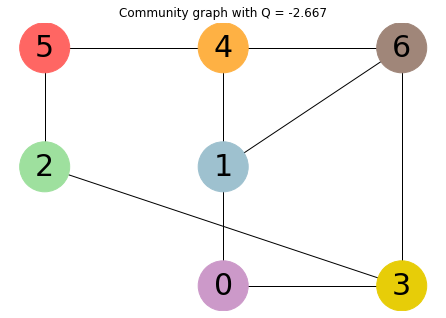

In [ ]:
Q = GetQ(A,S)
PlotToyGraph(A,S,Q)

## Optimal Cluster Assignment

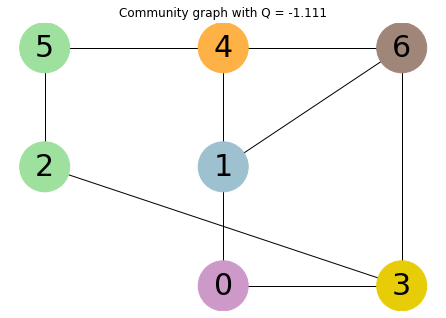

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S)
PlotToyGraph(A,S_optimal,Q_optimal)

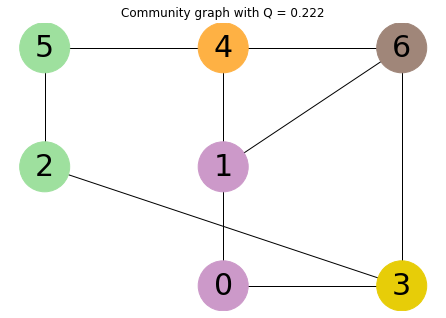

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal)

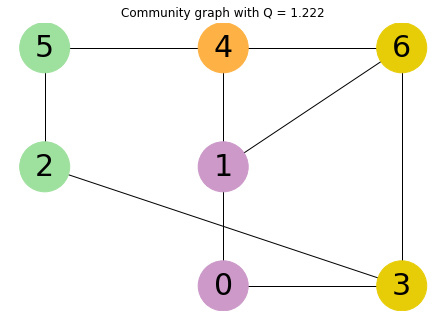

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal)

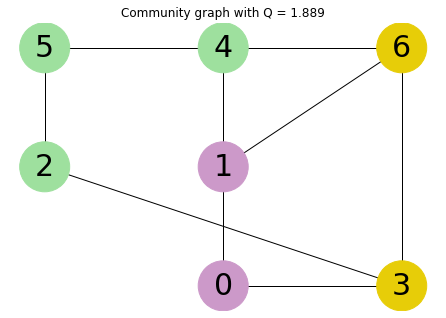

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal)

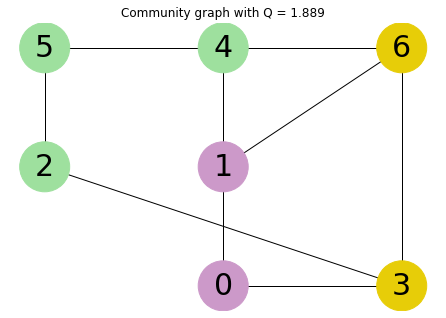

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal)

In [ ]:
S_optimal

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]])

## Printing Every Iteration

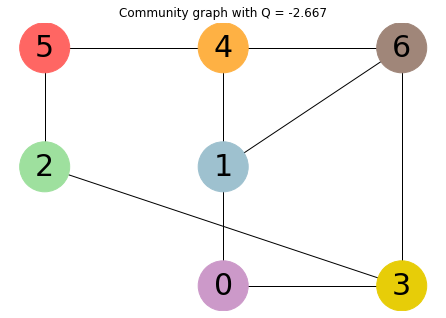

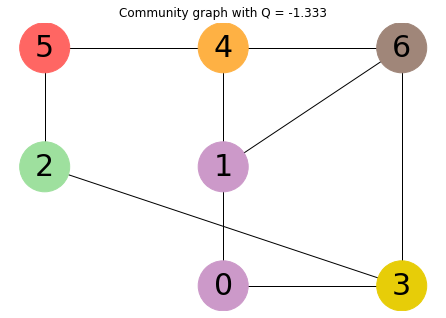

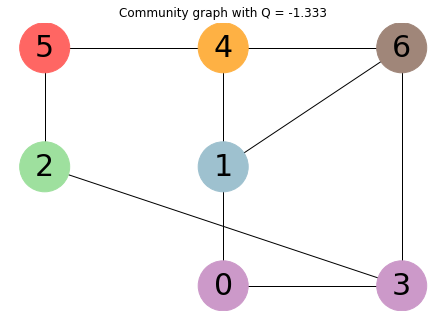

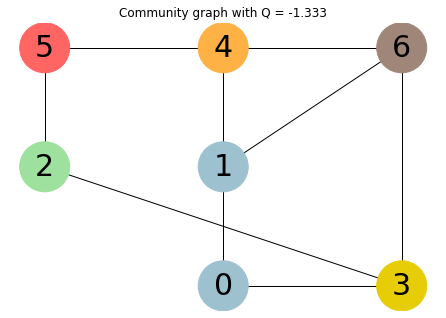

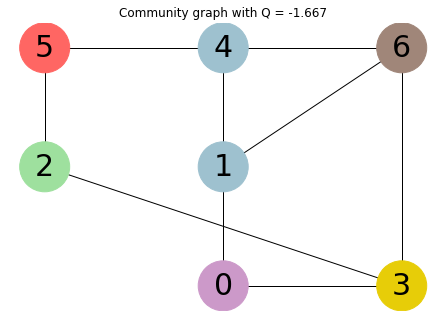

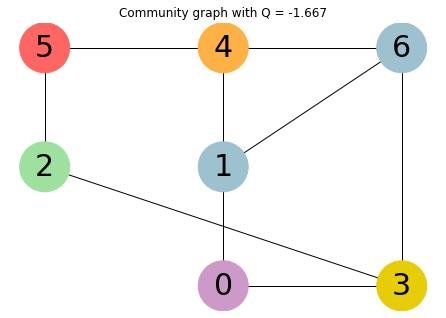

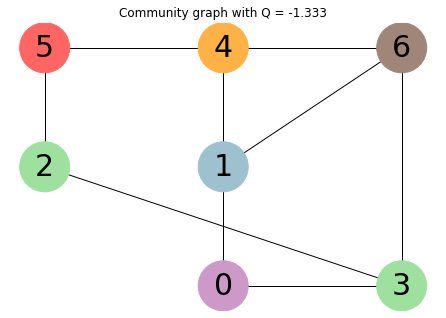

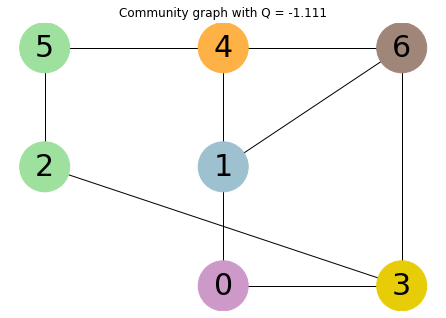

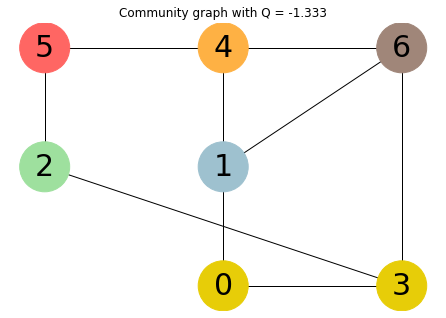

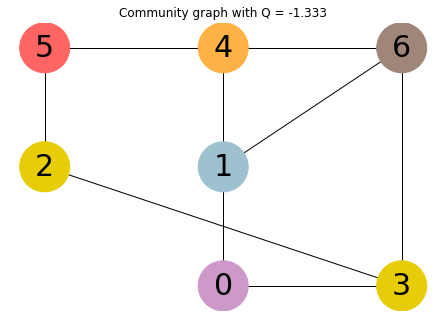

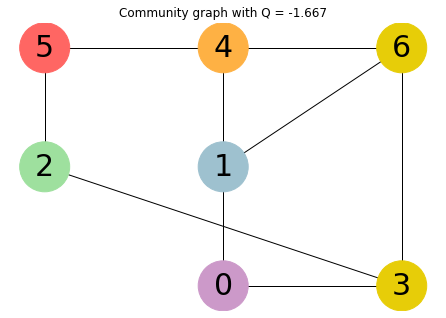

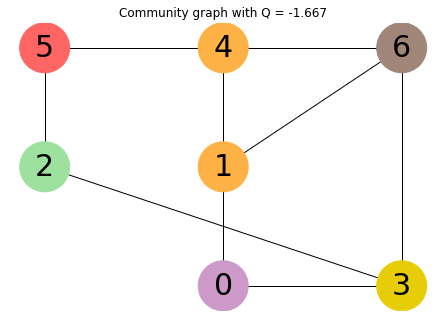

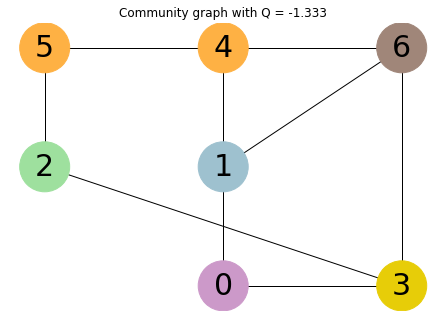

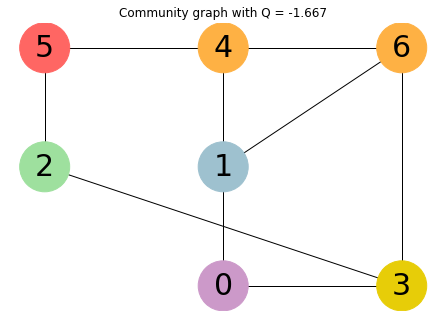

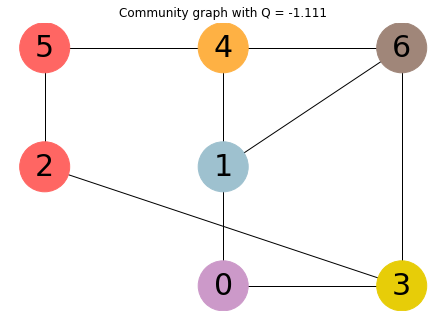

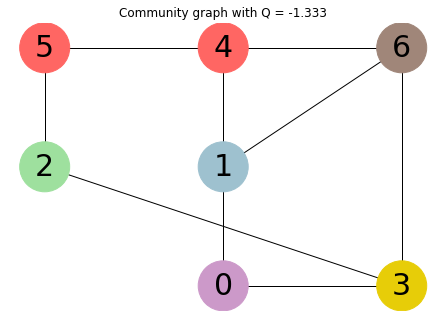

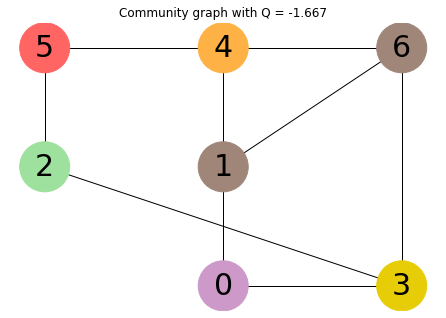

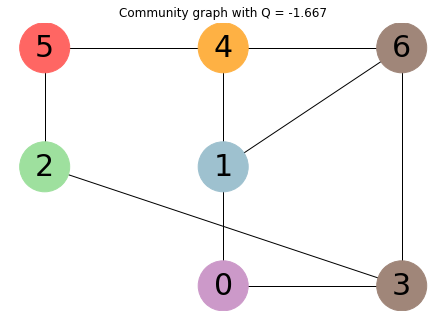

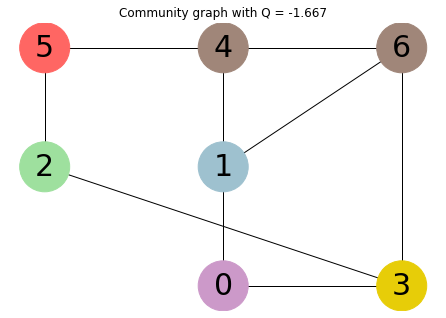

(array([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]), -1.1111111111111112)

In [ ]:
GetOptimalClusterAssignment(A,S,plotEachGraph=True)

# Drawing Weights

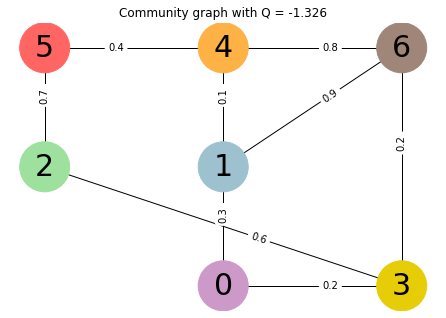

In [ ]:
A = np.array([
    [0,   0.3,  0,    0.2,  0,    0,    0   ],
    [0.3, 0,    0,    0,    0.1,  0,    0.9 ],
    [0,   0,    0,    0.6,  0,    0.7,  0   ],
    [0.2, 0,    0.6,  0,    0,    0,    0.2 ],
    [0,   0.1,  0,    0,    0,    0.4,  0.8 ],
    [0,   0,    0.7,  0,    0.4,  0,    0   ],
    [0,   0.9,  0,    0.2,  0.8,  0,    0   ]
])

S = np.eye(7, dtype=int)
Q = GetQ(A,S)
PlotToyGraph(A,S,Q,print_edges=True)

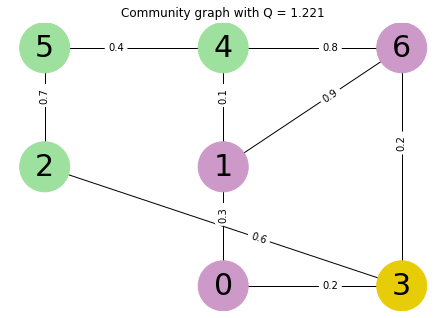

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal,print_edges=True)

# Toy $\mathbb{R}^2$ Dataset Example

In [ ]:
X = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [2, 0],
    [1, 2],
    [0, 2],
    [2, 2]
])

A = k3v(X,X)
A = np.around(A, decimals=2)
A

array([[ 4,  4,  1,  9,  4,  1,  9],
       [ 4,  9,  4,  9, 16,  9, 25],
       [ 1,  4,  4,  1,  9,  9,  9],
       [ 9,  9,  1, 25,  9,  1, 25],
       [ 4, 16,  9,  9, 36, 25, 49],
       [ 1,  9,  9,  1, 25, 25, 25],
       [ 9, 25,  9, 25, 49, 25, 81]])

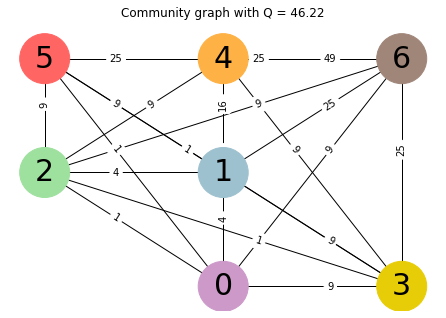

In [ ]:
S = np.eye(7, dtype=int)
Q = GetQ(A,S)
PlotToyGraph(A,S,Q, print_edges=True)

## Optimal Cluster Assignment

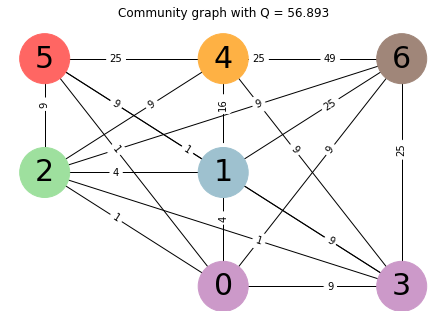

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S)
PlotToyGraph(A,S_optimal,Q_optimal, print_edges=True)

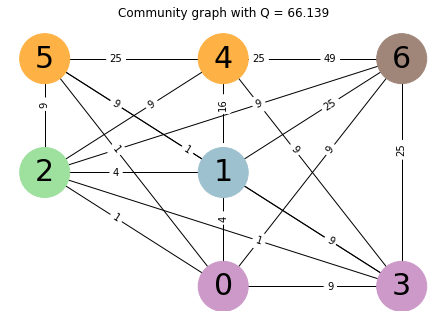

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal, print_edges=True)

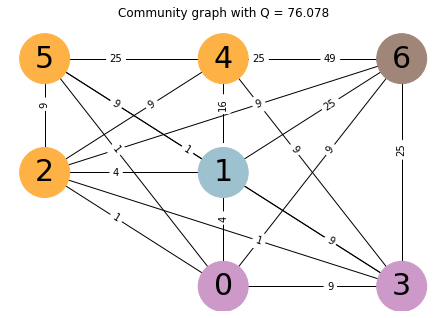

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal, print_edges=True)

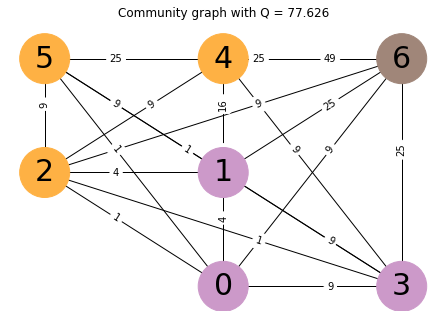

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal, print_edges=True)

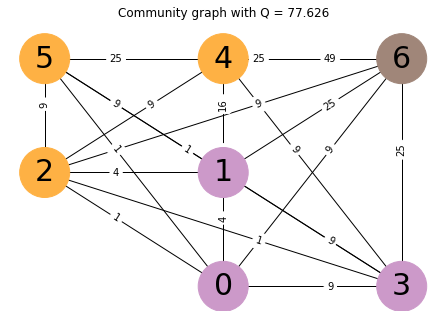

In [ ]:
S_optimal, Q_optimal = GetOptimalClusterAssignment(A, S_optimal)
PlotToyGraph(A,S_optimal,Q_optimal, print_edges=True)

# Louvain Algorithm

In [ ]:
def Louvain(A, epsilon=1e-5, max_iters=100):

  # Set initial assignment matrix
  S_old = np.eye(len(A), dtype=int)
  Q_old = -np.Inf

  for i in range(max_iters):
    # Calcuate Q
    S_new, Q_new = GetOptimalClusterAssignment(A, S_old)

    # tests is Q_old == Q_new
    if abs(Q_old - Q_new) <= epsilon:
      return S_new, Q_new

    # Reassigns the updated values
    Q_old = Q_new
    S_old = S_new

  return S_old, Q_old

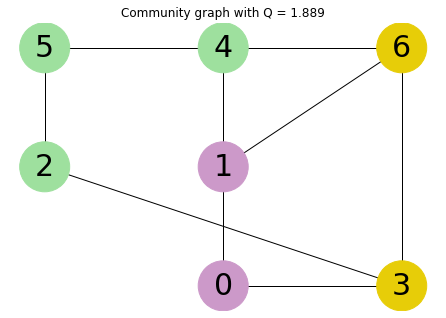

In [ ]:
A = np.array([
    [0, 1, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 1],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 1, 0, 0]
])

S_max, Q_max = Louvain(A)
PlotToyGraph(A,S_max,Q_max)